In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#X = Data['Lemma']
#y = Data['Manual Label']
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_resampled, y_resampled = oversample.fit_resample(X.values.reshape(-1, 1), y)
#oversampled_data = pd.DataFrame({'text': X_resampled.ravel(), 'manual_label': y_resampled})

In [ ]:
#from imblearn.over_sampling import ADASYN
#from sklearn.feature_extraction.text import CountVectorizer
#X = Data['Lemma']
#y = Data['Manual Label']
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(X)
#adasyn = ADASYN(sampling_strategy='minority')
#X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
X = Data['Lemma']
y = Data['Manual Label']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#X_train_vec = vectorizer.fit_transform(X_train.values.ravel())
#X_val_vec = vectorizer.transform(X_val.value.ravel())

#X_train_vec = vectorizer.fit_transform(X_train.ravel())
#X_val_vec = vectorizer.transform(X_val)

AttributeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:

rf = RandomForestClassifier(n_estimators=200,min_samples_split= 2,
                            random_state=42,class_weight='balanced')
svm = SVC(kernel='poly', C=10, gamma='scale', random_state=42,class_weight='balanced')
eec = EasyEnsembleClassifier(n_estimators=700, random_state=42)

In [ ]:
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([('rf', rf), ('svm', svm),('eec',eec)], voting='hard')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=10, class_weight='balanced', kernel='poly',
                                  random_state=42)),
                             ('eec',
                              EasyEnsembleClassifier(n_estimators=700,
                                                     random_state=42))])

In [ ]:
from sklearn.metrics import classification_report
ensemble_preds = ensemble.predict(X_val)
print(classification_report(y_val, ensemble_preds))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       472
           1       0.92      0.63      0.75       508

    accuracy                           0.78       980
   macro avg       0.81      0.78      0.78       980
weighted avg       0.81      0.78      0.77       980



In [ ]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [ ]:
y_true=Data2['clusters']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.10      0.40      0.16       880
           1       0.84      0.47      0.60      5765

    accuracy                           0.46      6645
   macro avg       0.47      0.43      0.38      6645
weighted avg       0.74      0.46      0.55      6645



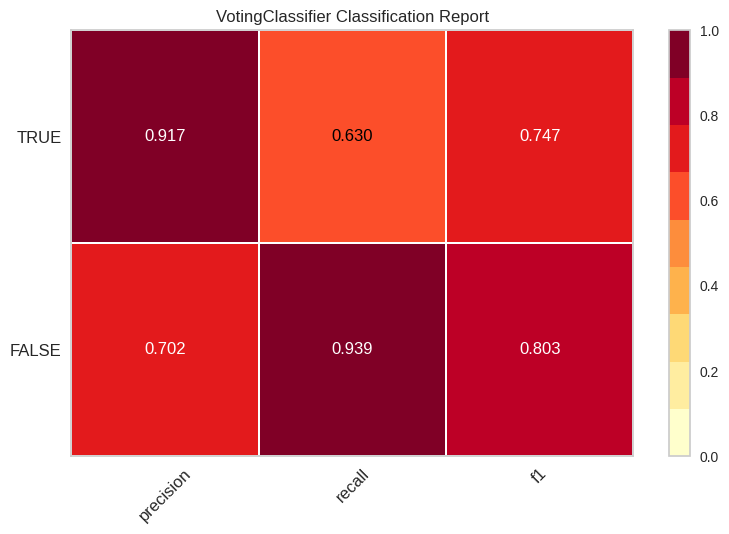

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()


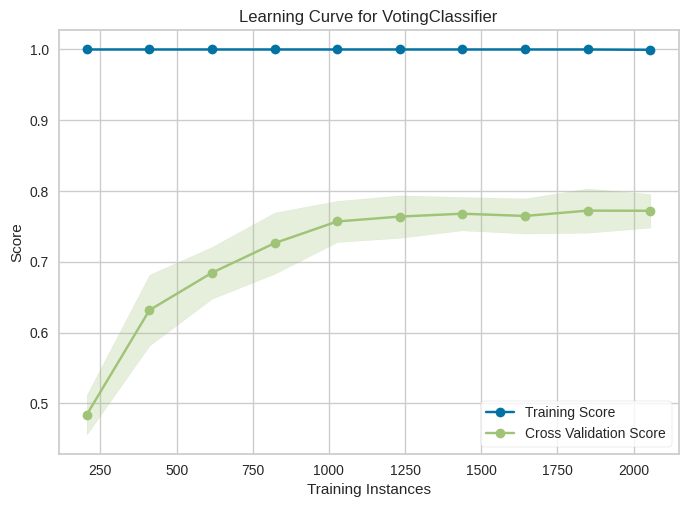

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train, y_train)
lc_viz.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_params = {'n_estimators': [100, 200, 300,400,500],
             'max_depth': [None, 5, 10],
             'min_samples_split': [2, 5, 10]}

svm_params = {'C': [1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5,n_jobs=1)
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5,n_jobs=1)

In [ ]:
rf_grid.fit(X_train_vec, y_train)
svm_grid.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=1,
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("Random forest best params:", rf_grid.best_params_)
print("SVM best params:", svm_grid.best_params_)

Random forest best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
